<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 04  </font></center></h1>
<h2><center> <font color='black'> Cross-sell / Up-sell using Recommendations </font></center></h2>
<h2><center> <font color='black'> Due date : 26 April 23:59 </font></center></h2>    
<h2><center> <font color='black'> BDA - University of Tartu - Spring 2020</font></center></h3>
</div>

# Homework instructions 


- Insert your team member names and student IDs in the field "Team mates" below. If you are not working in a team please insert only your name, surname and student ID 

- The accepted submission formats are Colab links or .ipynb files. If you are submitting Colab links please make sure that the privacy settings for the file is public so we can access your code. 

- The submission will automatically close at 12:00 am, so please make sure you have enough time to submit the homework. 

- Only one of the teammates should submit the homework. We will grade and give points to both of you! 

- You do not necessarily need to work on Colab. Especially as the size and the complexity of datasets will increase through the course, you can install jupyter notebooks locally and work from there.

- If you do not understand what a question is asking for, please ask in Moodle. 


**<h2><font color='red'>Team mates:</font></h2>**


<font color='red'>Name Surname: Enlik -</font>&emsp;   <font color='red'>Student ID: B96323</font>


<font color='red'>Name Surname: Thi Thuy Nga Vu</font>&emsp;   <font color='red'>Student ID: B88416</font>

# 1.  Market Basket Analysis (2 points)

**1.1 Consider the following businesses and think about one case of cross selling and one case of up selling techniques they could use. This question is not restricted to only traditional, standard examples. If you wish you can provide something that you would like these businesses to do. (1 points)**

a. An OnlineTravel Agency like Booking.com or AirBnB

<font color='red'> **Cross selling:**</font> recommend some tour packages made by locals

<font color='red'> **Up selling:**</font> get the booking cancellation for free by adding extra 10% of the booking price


b. A software company which produces products related to cyber security like Norton, Kaspersky, Avast and similar ones. 

<font color='red'> **Cross selling:**</font> get 50% discount for the mobile version (Android/iOS) when purchase our subscription plan in Windows/Mac

<font color='red'> **Up selling:**</font> get the best value (30% cheaper compare to monthly plan) when subscribe our yearly plan 

c. A company that sells cell phones 

<font color='red'> **Cross selling:**</font> give an offer to purchase high-quality screen protector and phone case that suits to the phone that you will buy.

<font color='red'> **Up selling:**</font> get additional 128GB internal storage just by adding 50EUR to current price 

d. A supermarket like Konsum, Rimi, Maxima etc. 

<font color='red'> **Cross selling:**</font> group the similar products together for a specific occasion, for example **Christmas** season, when customer can buy decoration, gift wrap, chocolate, and other christmas gifts in one place

<font color='red'> **Up selling:**</font> give an incentive (for example: extra 50% loyalty reward point) when customer spending more than 50EUR in one-time shopping

**1.2 One of the techniques which we discussed in the theory lecture for recommendater systems is Market Basket Analysis. The aim is to study the products bought frequently together and to recommend product in bunndles. Let's suppose that our client is a retail company that has an online shop. They have given to us the OnlineRetail.csv dataset (we have previously used this dataset in our practice sessions 03). It contains data about the online sales of several products. The client or  wants to know which product bundles to promote. Let us find the 5 association rules with the highest lift.**

In [1]:
import pandas as pd

df = pd.read_csv('OnlineRetailPurchase.csv', header=0 )

In [2]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**1.2 Use describe function from pandas to get statistical information about the values in the dataframe. Do you notice something which might not be correct? If so please perform the necessary operations. (Hint: Remember what we did in the practice session 03)(0.25 points)**

In [3]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,10000.000000,10000.000000,7709.000000
mean,7.828600,3.837412,15615.462576
std,104.322417,14.310148,1756.540802
min,-9360.000000,0.000000,12395.000000
25%,1.000000,1.250000,14388.000000
50%,2.000000,2.510000,15605.000000
75%,8.000000,4.210000,17228.000000
max,2880.000000,887.520000,18239.000000


In [4]:
print(sum(df['Quantity'] < 0))

130


In [5]:
# Remove all rows with quantity less than zero
df = df[df['Quantity'] >= 0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,9870.000000,9870.000000,7609.000000
mean,9.169301,3.837023,15620.763832
std,45.747927,14.391451,1755.451331
min,1.000000,0.000000,12395.000000
25%,1.000000,1.250000,14388.000000
50%,3.000000,2.510000,15640.000000
75%,8.000000,4.210000,17228.000000
max,2880.000000,887.520000,18239.000000


**1.3 Create a dataframe name as "Basket", where each row has an distintive value of InvoiceNo and each column has a distinctive Description. The cells in the table contain the count of each item (Description) mentioned in one invoice. For example basket.loc['536365','WHITE HANGING HEART T-LIGHT HOLDER'] has a value of 1 because the product with WHITE HANGING HEART T-LIGHT HOLDER was entered  only once in the invoice 536365. Hint: Remember the function you used in Homework 1 for a similar task or in practice session no.07 (0.25 points)**

In [6]:
# //TODO 
# Reference from Lab 07 - Reommendations System
## get number of ratings given by every user
# df_users_cnt = pd.DataFrame(df_ratings_drop_movies.groupby('userId').size(), columns=['count'])
# df_users_cnt.head()

basket = pd.DataFrame(df.groupby(['InvoiceNo', 'Description']).size(), columns=['Count'])
# basket = pd.DataFrame(df.groupby(['InvoiceNo', 'Description']).sum().unstack().reset_index().set_index('InvoiceNo'))
# basket.rename_axis(None, inplace=True)
basket

Count
InvoiceNo Description                               
536365    CREAM CUPID HEARTS COAT HANGER           1
          GLASS STAR FROSTED T-LIGHT HOLDER        1
          KNITTED UNION FLAG HOT WATER BOTTLE      1
          RED WOOLLY HOTTIE WHITE HEART.           1
          SET 7 BABUSHKA NESTING BOXES             1
...                                              ...
537224    WASHROOM METAL SIGN                      1
          WAY OUT METAL SIGN                       1
          WHITE BELL HONEYCOMB PAPER               2
          WHITE BELL HONEYCOMB PAPER GARLAND       2
          WOODEN BOX OF DOMINOES                   1

[9506 rows x 1 columns]

In [7]:
basket.loc['536365','WHITE HANGING HEART T-LIGHT HOLDER']

Count    1
Name: (536365, WHITE HANGING HEART T-LIGHT HOLDER), dtype: int64

In [8]:
basket.loc['537224','WHITE BELL HONEYCOMB PAPER ']

Count    2
Name: (537224, WHITE BELL HONEYCOMB PAPER ), dtype: int64

In [9]:
basket.loc['536412','12 DAISY PEGS IN WOOD BOX']

Count    5
Name: (536412, 12 DAISY PEGS IN WOOD BOX), dtype: int64

**1.4 Some products are mentioned more than once in one invoice. You can check the maximum number for each column to 
verify. Modify your dataframe such that every cell which has a value higher than one will be replaced with 1. If the cell has the value 0 it will remain the same. (0.25 points)**

In [10]:
# Reference
# https://kite.com/python/answers/how-to-change-values-in-a-pandas-dataframe-column-based-on-a-condition-in-python
basket_sets = basket.copy()
basket_sets.loc[basket_sets.Count > 1, "Count"] = 1
basket_sets.describe()

,Count
count,9506.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


**1.5 We do not need to spend time on calculating the association rules by ourselves as there already exists a package for python to do so, called mlxtend. We are going to use the mlxtend package to find frequent items bought together and then create some rules on what to recomend to a user based on what he/she/they have bought. We have given you the first part of the code which calculates the frequent items bought together.**

In [11]:
#!pip install mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml
import math

In [12]:
# Mlxtend has implemented Apriori, a popular algorithm for extracting frequent itemsets 
# We can change the value of minimum support but it will 
# But as well we get less useful results for the next step. 
# Setting use_colnames=True to convert the returned integer indices into item names

# TODO
# frequent_itemsets = apriori(basket_sets, min_support=0.03, use_colnames=True)
# frequent_itemsets

**Please read the documentation of the associaton rules function in mlextend [here](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/) and then complete the code so we get the 5 rules with the highest lift. Print those rules.  In the output antecedents represent if .... clause and consequents represent else... clause. For example if user bought product basket A then  the algorithm recommends product basket B. (0.25 points)**

In [13]:
#TODO

# rules = association_rules(..., metric=...)


# 2. Collaborative filtering (3.5 points )

We are going to use Books.csv dataset which contains  ratings from Amazon website and the data has the following features:

UserID: The ID of the users who read the books

BookTitle: The title of the book

Book-Rating: A rating given to the book in a scale from 0 to 10

Below we are going to perform the same steps we did with movies dataset in the practice session

**2.0 Load the dataset and take a look at the books titles. Please pick one of them which you like (or think that you would like) the most.(0.1 points)**

In [14]:
books = pd.read_csv("Books.csv", header=0)
books.head()

,UserID,Book-Rating,BookTitle
0,6181,0,Flesh Tones: A Novel
1,62,5,Flesh Tones: A Novel
2,163,0,Flesh Tones: A Novel
3,212,5,Flesh Tones: A Novel
4,250,9,Flesh Tones: A Novel


In [15]:
# pick my favorite book = 'Harry Potter and the Order of the Phoenix (Book 5)'
books[books['BookTitle'] == 'Harry Potter and the Order of the Phoenix (Book 5)'].head()

,UserID,Book-Rating,BookTitle
1818,6198,7,Harry Potter and the Order of the Phoenix (Boo...
1819,6283,10,Harry Potter and the Order of the Phoenix (Boo...
1820,7,0,Harry Potter and the Order of the Phoenix (Boo...
1821,56,9,Harry Potter and the Order of the Phoenix (Boo...
1822,117,0,Harry Potter and the Order of the Phoenix (Boo...


In [16]:
books.iloc[[1818]]

,UserID,Book-Rating,BookTitle
1818,6198,7,Harry Potter and the Order of the Phoenix (Boo...


**2.1 Our next step will be to perform user based collaborative filtering using KNN algorithm. As KNN algorithm does not accept strings, use a Label Encoder for BookTitle column.After that reshape the books matrix using pivot so every column will be a UserID and every row a BookTitle. (0.45 points)**

In [17]:
# Reference
# https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
from sklearn.preprocessing import LabelEncoder
books_encoded = books.apply(LabelEncoder().fit_transform)
books_encoded = books_encoded.rename(columns={"BookTitle": "BookID_Encoded"})
books_encoded

,UserID,Book-Rating,BookID_Encoded
0,6181,0,124
1,62,5,124
2,163,0,124
3,212,5,124
4,250,9,124
...,...,...,...
9995,3663,0,333
9996,3665,0,333
9997,3666,3,333
9998,3668,9,333


In [18]:
books_encoded_no_dup = books_encoded.drop_duplicates(['UserID', 'BookID_Encoded'])
books_encoded_no_dup

,UserID,Book-Rating,BookID_Encoded
0,6181,0,124
1,62,5,124
2,163,0,124
3,212,5,124
4,250,9,124
...,...,...,...
9995,3663,0,333
9996,3665,0,333
9997,3666,3,333
9998,3668,9,333


In [19]:
# Reference
# https://datascienceplus.com/building-a-book-recommender-system-the-basics-knn-and-matrix-factorization/
# Practice Lab 07

books_matrix = books_encoded_no_dup.pivot(index = 'BookID_Encoded', columns = 'UserID', values = 'Book-Rating').fillna(0)
print(books_matrix.shape)
books_matrix.head()

(336, 6292)


UserID,0,1,2,3,4,5,6,7,8,9,...,6282,6283,6284,6285,6286,6287,6288,6289,6290,6291
BookID_Encoded,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**2.2 Build a sparse matrix for books data and show it. (0.45 points)**

In [20]:
# Reference - Practice Lab 07
# transform matrix to scipy sparse matrix
from scipy.sparse import csr_matrix

books_matrix_sparse = csr_matrix(books_matrix.values)
print(f"Sparse matrix:\n{books_matrix_sparse}")

Sparse matrix:
  (1, 6228)	5.0
  (2, 365)	7.0
  (2, 5110)	9.0
  (2, 5226)	10.0
  (2, 6209)	10.0
  (3, 91)	7.0
  (3, 135)	8.0
  (3, 139)	10.0
  (3, 258)	9.0
  (3, 429)	6.0
  (3, 760)	5.0
  (3, 821)	6.0
  (3, 869)	9.0
  (3, 984)	10.0
  (3, 1328)	5.0
  (3, 1425)	10.0
  (3, 1781)	2.0
  (3, 1815)	9.0
  (3, 1820)	9.0
  (3, 1951)	8.0
  (3, 2360)	8.0
  (3, 2384)	8.0
  (3, 2449)	9.0
  (3, 2468)	7.0
  (3, 2956)	5.0
  :	:
  (333, 3411)	4.0
  (333, 3416)	1.0
  (333, 3433)	8.0
  (333, 3445)	5.0
  (333, 3450)	2.0
  (333, 3456)	4.0
  (333, 3461)	8.0
  (333, 3491)	2.0
  (333, 3497)	1.0
  (333, 3501)	4.0
  (333, 3518)	8.0
  (333, 3519)	3.0
  (333, 3527)	7.0
  (333, 3543)	7.0
  (333, 3546)	9.0
  (333, 3547)	7.0
  (333, 3573)	5.0
  (333, 3575)	1.0
  (333, 3581)	7.0
  (333, 3597)	3.0
  (333, 3602)	6.0
  (333, 3666)	3.0
  (333, 3668)	9.0
  (333, 6250)	2.0
  (333, 6277)	9.0


**2.3 Build and train two different KNN models (use cosine metric for similarity for both) but with different n_neighbours, that is 2 and 10. Recommend top 5 books based on your favourite one from 2.0 in both cases (1 points)**

In [21]:
from sklearn.neighbors import NearestNeighbors

model_knn_1 = NearestNeighbors(metric = 'cosine', algorithm = 'brute', n_neighbors=2)
model_knn_2 = NearestNeighbors(metric = 'cosine', algorithm = 'brute', n_neighbors=10)

In [22]:
model_knn_1.fit(books_matrix_sparse)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                 radius=1.0)

In [23]:
model_knn_2.fit(books_matrix_sparse)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [24]:
# Create new dataframe for
# Reference
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
books_encoded_title = pd.concat([books_encoded, books], join="outer", axis = 1)
books_encoded_title = books_encoded_title[['BookID_Encoded', 'BookTitle']]
books_encoded_title = books_encoded_title.drop_duplicates()
books_encoded_title = books_encoded_title.reset_index()
books_encoded_title = books_encoded_title.drop(columns = ['index'])
books_encoded_title.head()

,BookID_Encoded,BookTitle
0,124,Flesh Tones: A Novel
1,252,Rites of Passage
2,295,The Notebook
3,150,Help!: Level 1
4,271,The Amsterdam Connection : Level 4 (Cambridge ...


In [25]:
# create mapper from book title to index
# book: index
book_to_idx = {
    book: i for i, book in enumerate(list(books_encoded_title.set_index('BookID_Encoded').loc[books_matrix.index].BookTitle))
}
book_to_idx


{'007 El Mundo Nunca Es Suficiente': 0,
 '4000 Vornamen aus aller Welt. Von Alexander bis Zoe.': 1,
 "A Kid's Guide to How to Save the Planet (Camelot world)": 2,
 'A Kiss of Shadows (Meredith Gentry Novels (Paperback))': 3,
 'A Painted House': 4,
 'A String in the Harp': 5,
 'A Wrinkle In Time': 6,
 'Adressat unbekannt.': 7,
 'Advanced Photography, Sixth Edition': 8,
 'Alaska': 9,
 "Alice's Adventures in Wonderland and Through the Looking Glass": 10,
 'Alone with the Dead (Joe Keough Mysteries (Paperback))': 11,
 'Along Came a Spider (Alex Cross Novels)': 12,
 'Alte Freunde, neue Feinde. Ein Fall f�?¼r Bernhard Gunther.': 13,
 'Anna Karenina': 14,
 'Apricots on the Nile: A Memoir with Recipes': 15,
 'Artemis Fowl (Artemis Fowl, Book 1)': 16,
 'Artemis Fowl.': 17,
 'Asche zu Asche.': 18,
 'At the Edge': 19,
 'Attack Of The Deranged Mutant Killer Snow Goons': 20,
 'Auf Ehre und Gewissen. Roman.': 21,
 'Auf der Suche nach dem verlorenen Gl�?¼ck.': 22,
 'Auf d�?¼nnem Eis.': 23,
 "BD Pirat

In [26]:
# utils import
from fuzzywuzzy import fuzz

def fuzzy_matching(mapper, fav_book, verbose=True):
    """
    return the closest match via fuzzy ratio. If no match found, return None
    
    Parameters
    ----------    
    mapper: dict, map book title name to index of the book in data

    fav_book: str, name of user input book
    
    verbose: bool, print log if True

    Return
    ------
    index of the closest match
    """
    match_tuple = []
    # get match
    for title, idx in mapper.items():
        ratio = fuzz.ratio(title.lower(), fav_book.lower())
        if ratio >= 60:
            match_tuple.append((title, idx, ratio))
            
    # sort
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('Oops! No match is found')
        return
    if verbose:
        print('Found possible matches in our database: {0}\n'.format([x[0] for x in match_tuple]))
    return match_tuple[0][1]



def make_recommendation(model_knn, data, mapper, fav_book, n_recommendations):
    """
    return top n similar book recommendations based on user's input book


    Parameters
    ----------
    model_knn: sklearn model, knn model

    data: book-user matrix

    mapper: dict, map book title name to index of the book in data

    fav_book: str, name of user input book

    n_recommendations: int, top n recommendations

    Return
    ------
    list of top n similar book recommendations
    """
    # fit
    model_knn.fit(data)
    
    # get input book index
    print('You have input book:', fav_book)
    idx = fuzzy_matching(mapper, fav_book, verbose=True)
    
    # inference
    print('Recommendation system start to make inference')
    print('......\n')
    distances, indices = model_knn.kneighbors(data[idx], n_neighbors=n_recommendations+1)
    # get list of raw idx of recommendations
    raw_recommends = \
        sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    # get reverse mapper
    reverse_mapper = {v: k for k, v in mapper.items()}
    # print recommendations
    print('Recommendations for {}:'.format(fav_book))
    for i, (idx, dist) in reversed(list(enumerate(raw_recommends))):
        #j =i
        print('{0}: {1}, with distance of {2}'.format(n_recommendations-i, reverse_mapper[idx], dist))
        

In [27]:
my_favorite = 'Harry Potter and the Order of the Phoenix (Book 5)'
# my_favorite = 'Harry Potter and the Prisoner of Azkaban'
# my_favorite = 'How To Win Friends And Influence People'
# my_favorite = 'Sushi for Beginners : A Novel (Keyes, Marian)'

In [28]:
#TODO - check why the result with different model is exactly same

# Recommendation based on KNN model 1
make_recommendation(
    model_knn=model_knn_1, # trained model (model)
    data=books_matrix_sparse, # sparse matrix (data)
    fav_book=my_favorite, # fav_book
    mapper=book_to_idx, # {book: index} (mapper)
    n_recommendations=5) 

You have input book: Harry Potter and the Order of the Phoenix (Book 5)
Found possible matches in our database: ['Harry Potter and the Order of the Phoenix (Book 5)', "Harry Potter and the Sorcerer's Stone Movie Poster Book", 'Harry Potter and the Prisoner of Azkaban', 'Harry Potter und der Stein der Weisen']

Recommendation system start to make inference
......

Recommendations for Harry Potter and the Order of the Phoenix (Book 5):
1: Moon Handbooks: Hawaii, with distance of 0.9281630286084136
2: A Wrinkle In Time, with distance of 0.9367295186553608
3: The Second Summer of the Sisterhood, with distance of 0.9397670038835066
4: The Da Vinci Code, with distance of 0.9401336850106279
5: Quidditch Through the Ages, with distance of 0.9412078850185526


In [29]:
# Recommendation based on KNN model 2
make_recommendation(
    model_knn=model_knn_2, # trained model (model)
    data=books_matrix_sparse, # sparse matrix (data)
    fav_book=my_favorite, # fav_book
    mapper=book_to_idx, # {book: index} (mapper)
    n_recommendations=5)

You have input book: Harry Potter and the Order of the Phoenix (Book 5)
Found possible matches in our database: ['Harry Potter and the Order of the Phoenix (Book 5)', "Harry Potter and the Sorcerer's Stone Movie Poster Book", 'Harry Potter and the Prisoner of Azkaban', 'Harry Potter und der Stein der Weisen']

Recommendation system start to make inference
......

Recommendations for Harry Potter and the Order of the Phoenix (Book 5):
1: Moon Handbooks: Hawaii, with distance of 0.9281630286084136
2: A Wrinkle In Time, with distance of 0.9367295186553608
3: The Second Summer of the Sisterhood, with distance of 0.9397670038835066
4: The Da Vinci Code, with distance of 0.9401336850106279
5: Quidditch Through the Ages, with distance of 0.9412078850185526


**2.4 Discuss the results you received in both cases. Would you like to read some of the recommended books? Out of 2 or 10 neighbors, which one worked better? (There is no right or wrong answer in this question) (0.25 points)**

<font color='red'> **Answer:**</font>

- I would like to read The Da Vinci Code and Quidditch Through the Ages, but not the other books
- It give the exact same result with same distance value, so both of models works in same way

**2.5 Add a new user (with user “UserID” = 6293) in your data. Using the two trained models in task 2.3 suggest which books should this user read if his ratings are:**

French Cuisine for All: 4


Harry Potter and the Sorcerer's Stone Movie Poster Book: 5


El Perfume: Historia De UN Asesino/Perfume : The Story of a Murderer: 1

**(1. 25 points)**



In [30]:
books_encoded_title[books_encoded_title['BookTitle'] == 'French Cuisine for All']

,BookID_Encoded,BookTitle
214,128,French Cuisine for All


In [31]:
books_encoded_title[books_encoded_title['BookTitle'] == "Harry Potter and the Sorcerer's Stone Movie Poster Book"]

,BookID_Encoded,BookTitle
311,145,Harry Potter and the Sorcerer's Stone Movie Po...


In [32]:
books_encoded_title[books_encoded_title['BookTitle'] == "El Perfume: Historia De UN Asesino/Perfume : The Story of a Murderer"]

,BookID_Encoded,BookTitle
289,116,El Perfume: Historia De UN Asesino/Perfume : T...


In [33]:
new_df = pd.DataFrame({"UserID":[6293, 6293, 6293], 
                       "Book-Rating":[4, 5, 1], 
                       "BookID_Encoded":[128, 145, 116]})
new_df

,UserID,Book-Rating,BookID_Encoded
0,6293,4,128
1,6293,5,145
2,6293,1,116


In [34]:
books_encoded_no_dup_new = books_encoded_no_dup.append(new_df)
books_encoded_no_dup_new = books_encoded_no_dup_new.reset_index()
books_encoded_no_dup_new = books_encoded_no_dup_new.drop(columns = ['index'])
books_encoded_no_dup_new.tail()

,UserID,Book-Rating,BookID_Encoded
9996,3668,9,333
9997,3670,0,333
9998,6293,4,128
9999,6293,5,145
10000,6293,1,116


In [35]:
books_matrix_new = books_encoded_no_dup_new.pivot(index = 'BookID_Encoded', columns = 'UserID', values = 'Book-Rating').fillna(0)
books_matrix_sparse_new = csr_matrix(books_matrix_new.values)
# print(f"Sparse matrix:\n{books_matrix_sparse_new}")

In [36]:
my_favorite = "Harry Potter and the Sorcerer's Stone Movie Poster Book"

In [37]:
# Recommendation based on KNN model 1
make_recommendation(
    model_knn=model_knn_1, # trained model (model)
    data=books_matrix_sparse, # sparse matrix (data)
    fav_book=my_favorite, # fav_book
    mapper=book_to_idx, # {book: index} (mapper)
    n_recommendations=5)

You have input book: Harry Potter and the Sorcerer's Stone Movie Poster Book
Found possible matches in our database: ["Harry Potter and the Sorcerer's Stone Movie Poster Book", 'Harry Potter and the Order of the Phoenix (Book 5)', 'Harry Potter and the Prisoner of Azkaban']

Recommendation system start to make inference
......

Recommendations for Harry Potter and the Sorcerer's Stone Movie Poster Book:
1: Nadie Es Perfecto (Narrativa Actual), with distance of 1.0
2: Nomadentochter., with distance of 1.0
3: Nachtschicht., with distance of 1.0
4: My \"Star Trek\" Memories, with distance of 1.0
5: Night Sins, with distance of 1.0


In [38]:
# Recommendation based on KNN model 2
make_recommendation(
    model_knn=model_knn_2, # trained model (model)
    data=books_matrix_sparse_new, # sparse matrix (data)
    fav_book=my_favorite, # fav_book
    mapper=book_to_idx, # {book: index} (mapper)
    n_recommendations=5)

You have input book: Harry Potter and the Sorcerer's Stone Movie Poster Book
Found possible matches in our database: ["Harry Potter and the Sorcerer's Stone Movie Poster Book", 'Harry Potter and the Order of the Phoenix (Book 5)', 'Harry Potter and the Prisoner of Azkaban']

Recommendation system start to make inference
......

Recommendations for Harry Potter and the Sorcerer's Stone Movie Poster Book:
1: French Cuisine for All, with distance of 0.7974521265832667
2: El Perfume: Historia De UN Asesino/Perfume : The Story of a Murderer, with distance of 0.97756064455674
3: Matilda, with distance of 1.0
4: Night Sins, with distance of 1.0
5: Nadie Es Perfecto (Narrativa Actual), with distance of 1.0


Book suggestion for **UserID” = 6293** are:

1. Nadie Es Perfecto (Narrativa Actual), with distance of 1.0
2. Nomadentochter., with distance of 1.0
3. Nachtschicht., with distance of 1.0
4. My \"Star Trek\" Memories, with distance of 1.0
5. Night Sins, with distance of 1.0


# 3. Recommender systems evaluation (1.5 points)

We are going to compare different methods of recommender systems by their RMSE score. One useful package that has several recommender algorithms for Python is [Surprise](https://surprise.readthedocs.io/en/stable/getting_started.html). Below we have split the books dataset into training and test and used the KNNBasic algorithm to predict the ratings for the test set using surprise. 

In [39]:
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader
from surprise import Dataset
from surprise import SVD
from surprise import NormalPredictor
from surprise import KNNBasic

# The reader is necessary for surprise to interpret the ratings
reader = Reader(rating_scale=(0, 10))

# This function loads data from a pandas dataframe into surprise dataset structure
# The columns should always be ordered like this
# data = Dataset.load_from_df(df[['UserID', 'BookTitle', 'Book-Rating']], reader)
data = Dataset.load_from_df(books[['UserID', 'BookTitle', 'Book-Rating']], reader)

# Split in trainset and testset
# No need to define the label y because for surprise the last column is always the rating
trainset, testset = train_test_split(data, test_size=.25, random_state=0 )

knn = KNNBasic()
knn.fit(trainset)
predictions = knn.test(testset)
print('KNN RMSE', accuracy.rmse(predictions))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 4.1033
KNN RMSE 4.10333158257073


**3.1 After taking a look at surprise documentation and the code above, follow the same steps as with KNN, and predict the ratings in test set using the NormalPredictor which predicts a random rating based on the distribution of the training set. Do the same for SVD which  is a matrix factorization technique. For both of them report RMSE. (We already have imported the functions for you)**

In [40]:
from surprise.model_selection import cross_validate

In [41]:
# np_result = cross_validate(NormalPredictor(), data, measures=['RMSE'], cv=2, verbose=True)

npred = NormalPredictor()
npred.fit(trainset)
pred_npred = npred.test(testset)
accuracy.rmse(pred_npred)

RMSE: 5.1224


5.122365536454936

In [42]:
svd = SVD()
svd.fit(trainset)
pred_SVD = svd.test(testset)
accuracy.rmse(pred_SVD)

RMSE: 3.8672


3.867162028234269

In [43]:
# Do benchmarking between KNNBasic, NormalPredictor, and SVD
# Reference:
# https://towardsdatascience.com/building-and-testing-recommender-systems-with-surprise-step-by-step-d4ba702ef80b

benchmark = []
# Iterate over all algorithms
for algorithm in [KNNBasic(), NormalPredictor(), SVD(), ]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
Algorithm,,,
SVD,3.865898,0.626220,0.048413
KNNBasic,4.110573,1.098636,0.489553
NormalPredictor,5.126073,0.018608,0.059082


# 4. Neural Networks (3 Points)

**4.1 We are now going to build a recommender system using Neural Networks. Being this dataset is really small in terms of features you might not see great improvements but it is a good starting point to learn. Please build  exactly the same neural network as we did in practice session part 3, which had the following layers:**
- 2 Embedding
- 2 Reshape
- 1 Dense

**Use the Neural Network you built to learn from the train data of part 3 of this homework.  The column UserID should be used as input to your NN for the user embedding layer. For the books embedding layer we will use BookTitle column. Lastly, the ratings will be your target variable. Regarding the evaluation metric for the training phase use RMSE. To make your training fast you can use a batch size of 200 or above. (1.75 points)**

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from keras.layers import Input, Embedding, Flatten, Dot, Dense, Multiply, Concatenate, Dropout, Reshape
from keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.regularizers import l2


In [62]:
print(books_encoded_no_dup_new['UserID'].nunique())

6293


In [63]:
# user_enc = LabelEncoder()
# books_encoded_no_dup_new['UserID'] = user_enc.fit_transform(books_encoded_no_dup_new['UserID'].values)
# n_users = books_encoded_no_dup_new['UserID'].nunique()

# item_enc = LabelEncoder()
# books_encoded_no_dup_new['BookID_Encoded'] = item_enc.fit_transform(books_encoded_no_dup_new['BookID_Encoded'].values)
# n_books = books_encoded_no_dup_new['BookID_Encoded'].nunique()

# books_encoded_no_dup_new['Book-Rating'] = books_encoded_no_dup_new['Book-Rating'].values.astype(np.float32)
# min_rating = min(books_encoded_no_dup_new['Book-Rating'])
# max_rating = max(books_encoded_no_dup_new['Book-Rating'])


# n_users, n_books, min_rating, max_rating

n_users = books_encoded_no_dup_new['UserID'].nunique()
n_books = books_encoded_no_dup_new['BookID_Encoded'].nunique()
min_rating = min(books_encoded_no_dup_new['Book-Rating'])
max_rating = max(books_encoded_no_dup_new['Book-Rating'])

n_users, n_books, min_rating, max_rating

(6293, 336, 0, 10)

In [47]:
# books_encoded_no_dup_new = books_encoded_no_dup_new.reindex(columns=['UserID', 'BookID_Encoded', 'Book-Rating'])
# books_encoded_no_dup_new

In [64]:
X = books[['UserID', 'BookTitle']].values
y = books['Book-Rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6700, 2), (3300, 2), (6700,), (3300,))

In [66]:
# X = books_encoded_no_dup_new[['UserID', 'BookID_Encoded']].values
# y = books_encoded_no_dup_new['Book-Rating'].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

# # The reader is necessary for surprise to interpret the ratings
# reader = Reader(rating_scale=(0, 10))

# # This function loads data from a pandas dataframe into surprise dataset structure
# # The columns should always be ordered like this
# # data = Dataset.load_from_df(df[['UserID', 'BookTitle', 'Book-Rating']], reader)
# data = Dataset.load_from_df(books[['UserID', 'BookTitle', 'Book-Rating']], reader)

# # Split in trainset and testset
# # No need to define the label y because for surprise the last column is always the rating
# X_train, X_test, y_train, y_test = train_test_split(data, test_size=.25, random_state=0 )

((7500, 2), (2501, 2), (7500,), (2501,))

In [67]:
n_factors = 50
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [68]:
# using only embeddings, same as previous lab session
def RecommenderV1(n_users, n_books, n_factors):
    user = Input(shape=(1,))
    
    ## n_users should be added + 1 to resolve InvalidArgumentError: indices[x,x] = xxxx is not in [0, xxxx)
    ## Reference: https://stackoverflow.com/questions/54880279/how-to-handle-invalid-argument-error-in-keras
    u = Embedding(n_users+1, n_factors, embeddings_initializer='he_normal',
                  embeddings_regularizer=l2(1e-6))(user)
    u = Reshape((n_factors,))(u)
    
    book = Input(shape=(1,))
    m = Embedding(n_books, n_factors, embeddings_initializer='he_normal',
                  embeddings_regularizer=l2(1e-6))(book)
    m = Reshape((n_factors,))(m)
    
    x = Dot(axes=1)([u, m])   
    model = Model(inputs=[user, book], outputs=x)
    opt = Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

In [69]:
def compile_fit_plot(model,num):
    model.summary()


    model.compile(loss='mse', optimizer='adam', metrics=['mse'])

    # Set batch_size to 200 or more, to make training process faster
    history = model.fit(x=X_train_array, y=y_train, batch_size=200, epochs=5,
                        verbose=1, validation_data=(X_test_array, y_test))
    
    # Plot training & validation accuracy values
    plt.plot(history.history['mse'])
    plt.plot(history.history['val_mse'])
    plt.title('Model MSE')
    plt.ylabel('mean_squared_error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    import math
    # Show the best validation RMSE
    min_val_loss, idx = min((val, idx) for (idx, val) in enumerate(history.history['val_loss']))
    print(f"\nModel: {num},\nMinimum RMSE at epoch: {idx+1} = {math.sqrt(min_val_loss)}")
    #print ('\nModel: {:d}\n'.format(num),'Minimum RMSE at epoch', '{:d}'.format(idx+1), '=', '{:.4f}'.format(math.sqrt(min_val_loss)))
    



def predict_recommend(model,test_user ):
    
        # Function to predict the ratings given User ID and Book ID
    def predict_rating1(user_id, item_id):
        return model.predict([np.array([user_id-1]), np.array([item_id-1])])[0][0]
    
    # Function to predict the ratings given User ID and Book ID
    def predict_rating2(user_id, item_id):        
        if item_id<=336:
            prediction = model.predict([np.array([user_id-1]), np.array([item_id])])[0][0]
            return prediction
        
    TEST_USER = test_user


    user_ratings = books_encoded_no_dup_new[books_encoded_no_dup_new['UserID'] == TEST_USER][['UserID', 'BookID_Encoded', 'Book-Rating']]

    user_ratings['prediction'] = user_ratings.apply(lambda x: predict_rating1(TEST_USER, x['BookID_Encoded']), axis=1)
    user_ratings.sort_values(by='Book-Rating', 
                             ascending=False).merge(books_encoded_title, 
                                                    on='BookID_Encoded', 
                                                    how='inner', 
                                                    suffixes=['_u', '_m']).head(20)
    
    recommendations = books_encoded_no_dup_new[books_encoded_no_dup_new['BookID_Encoded'].isin(user_ratings['BookID_Encoded']) == False][['BookID_Encoded']].drop_duplicates()
    recommendations['prediction'] = recommendations.apply(lambda x: predict_rating2(TEST_USER, x['BookID_Encoded']), axis=1)
    recommendations.sort_values(by='prediction',
                              ascending=False).merge(books_encoded_title,
                                                     on='BookID_Encoded',
                                                     how='inner',
                                                     suffixes=['_u', '_m']).head(20)
    
    return user_ratings, recommendations

In [70]:
# Define constants
#K_FACTORS = 100 # The number of dimensional embeddings for books and users
# TEST_USER = 6293

model1 = RecommenderV1(n_users, n_books, n_factors)
# compile_fit_plot(model1, 1)

# user_ratings_1, recommendations_1 = predict_recommend(model1,TEST_USER)

**4.2 Plot the RMSE values during the training phase, as well as the model loss. Report the best RMSE. Is it better than the RMSE from the models we built in Section 2 and 3 ? (0.75 points)**

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1, 50)        314700      input_3[0][0]                    
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 1, 50)        16800       input_4[0][0]                    
____________________________________________________________________________________________

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 7500 samples, validate on 2501 samples
Epoch 1/5
7500/7500 [==============================] - 1s 67us/step - loss: 27.5276 - mse: 27.5274 - val_loss: 27.9858 - val_mse: 27.9856
Epoch 2/5
7500/7500 [==============================] - 0s 52us/step - loss: 27.4061 - mse: 27.4060 - val_loss: 27.9860 - val_mse: 27.9858
Epoch 3/5
7500/7500 [==============================] - 0s 46us/step - loss: 27.2142 - mse: 27.2140 - val_loss: 27.9867 - val_mse: 27.9865
Epoch 4/5
7500/7500 [==============================] - 0s 45us/step - loss: 26.8723 - mse: 26.8720 - val_loss: 27.9863 - val_mse: 27.9860
Epoch 5/5
7500/7500 [==============================] - 0s 42us/step - loss: 26.3237 - mse: 26.3234 - val_loss: 27.9853 - val_mse: 27.9849


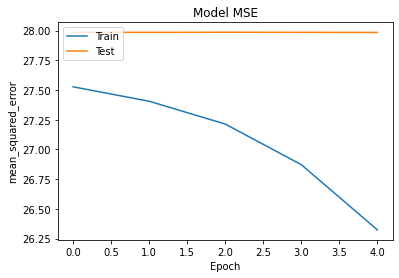

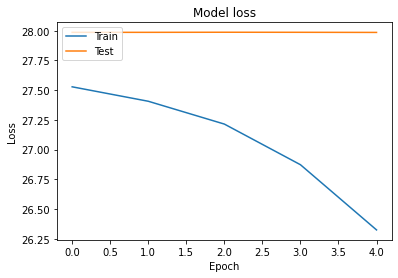


Model: 1,
Minimum RMSE at epoch: 5 = 5.290111536280468


In [71]:
compile_fit_plot(model1, 1)

**4.3 Use your trained model to recommend books for user with ID 6293. (0.5 points)**

In [72]:
user_ratings_1, recommendations_1 = predict_recommend(model1,6293)

In [73]:
user_ratings_1

,UserID,BookID_Encoded,Book-Rating,prediction
9998,6293,128,4,-0.001845
9999,6293,145,5,0.000072
10000,6293,116,1,0.001228


In [74]:
recommendations_1

,BookID_Encoded,prediction
0,124,0.001987
53,252,-0.003256
55,295,0.008084
159,150,-0.002210
160,271,-0.004467
...,...,...
8296,285,0.002871
8772,183,0.001126
8773,51,0.004565
8774,334,0.001972


## How long did it take you to solve the homework?

* Please answer as precisely as you can. It does not affect your points or grade in any way. It is okay, if it took 0.5 hours or 24 hours. The collected information will be used to improve future homeworks.

<font color='red'> **Answer:**</font>

**<font color='red'>(please change X in the next cell into your estimate)</font>**

10 hours

## What is the level of difficulty for this homework?
you can put only number between $0:10$ ($0:$ easy, $10:$ difficult)

<font color='red'> **Answer:**</font>
7